# <center>Kiss Dániel Márk</center>
## <center>WP871Q</center>

# Library import

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Data import

In [22]:
df_verseny_public_train = pd.read_csv('data/verseny_public_train.csv', sep=',', low_memory=False)

# Data familirsation

In [23]:
df_verseny_public_train

,cookie_id,Topic1_ic,Topic1_ec,Topic2_ic,Topic2_ec,Topic3_ic,Topic3_ec,Topic4_ic,Topic4_ec,Topic5_ic,...,Topic177_ec,Topic178_ic,Topic178_ec,Topic179_ic,Topic179_ec,Topic180_ic,Topic180_ec,Topic181_ic,Topic181_ec,target
0,100000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,8,57,0,0,15,43,0,...,0,0,0,0,0,0,0,0,0,0
2,100002,0,0,0,0,8,50,8,50,0,...,0,0,0,0,0,0,0,0,0,0
3,100003,15,15,8,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100004,0,0,8,15,0,0,15,15,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,0,0,0,0,127,1,8,1,22,...,0,0,0,0,0,0,0,0,0,0
99996,199996,50,8,0,0,57,1,50,8,50,...,0,0,0,0,0,0,0,0,0,0
99997,199997,15,127,0,0,22,1,71,120,8,...,0,0,0,0,0,0,0,0,0,0
99998,199998,8,8,0,0,43,1,8,64,8,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_verseny_public_train.describe()

,cookie_id,Topic1_ic,Topic1_ec,Topic2_ic,Topic2_ec,Topic3_ic,Topic3_ec,Topic4_ic,Topic4_ec,Topic5_ic,...,Topic177_ec,Topic178_ic,Topic178_ec,Topic179_ic,Topic179_ec,Topic180_ic,Topic180_ec,Topic181_ic,Topic181_ec,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.000000
mean,149999.500000,8.798000,16.085980,1.066320,7.923940,19.105870,8.563590,15.600520,23.712400,4.927330,...,0.002190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015000
std,28867.657797,23.308133,48.515646,5.824816,50.279646,42.710725,40.371399,31.981042,54.356458,17.719046,...,0.501804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121553
min,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,124999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,149999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,174999.250000,8.000000,8.000000,0.000000,0.000000,22.000000,1.000000,15.000000,22.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,199999.000000,477.000000,1548.000000,610.000000,1576.000000,631.000000,1506.000000,603.000000,1632.000000,512.000000,...,134.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [25]:
df_verseny_public_train.columns

Index(['cookie_id', 'Topic1_ic', 'Topic1_ec', 'Topic2_ic', 'Topic2_ec',
       'Topic3_ic', 'Topic3_ec', 'Topic4_ic', 'Topic4_ec', 'Topic5_ic',
       ...
       'Topic177_ec', 'Topic178_ic', 'Topic178_ec', 'Topic179_ic',
       'Topic179_ec', 'Topic180_ic', 'Topic180_ec', 'Topic181_ic',
       'Topic181_ec', 'target'],
      dtype='object', length=258)

# Feature importance

## Decision Tree

Feature ranking:
1. Feature 59 (0.038827) Topic42_ec
2. Feature 17 (0.030778) Topic12_ec
3. Feature 82 (0.029022) Topic63_ic
4. Feature 7 (0.026319) Topic4_ec
5. Feature 68 (0.024741) Topic55_ic
6. Feature 61 (0.023082) Topic51_ec
7. Feature 21 (0.022804) Topic14_ec
8. Feature 83 (0.022338) Topic63_ec
9. Feature 16 (0.021560) Topic12_ic
10. Feature 66 (0.019745) Topic54_ic
11. Feature 70 (0.018750) Topic56_ic
12. Feature 18 (0.016906) Topic13_ic
13. Feature 28 (0.016797) Topic19_ic
14. Feature 29 (0.016604) Topic19_ec
15. Feature 63 (0.016319) Topic52_ec
16. Feature 69 (0.016248) Topic55_ec
17. Feature 20 (0.015649) Topic14_ic
18. Feature 6 (0.015643) Topic4_ic
19. Feature 14 (0.015413) Topic10_ic
20. Feature 71 (0.015002) Topic56_ec
21. Feature 9 (0.013981) Topic5_ec
22. Feature 67 (0.013756) Topic54_ec
23. Feature 22 (0.013408) Topic15_ic
24. Feature 135 (0.013298) Topic99_ec
25. Feature 19 (0.013186) Topic13_ec
26. Feature 35 (0.012834) Topic24_ec
27. Feature 131 (0.011880) Topic97_

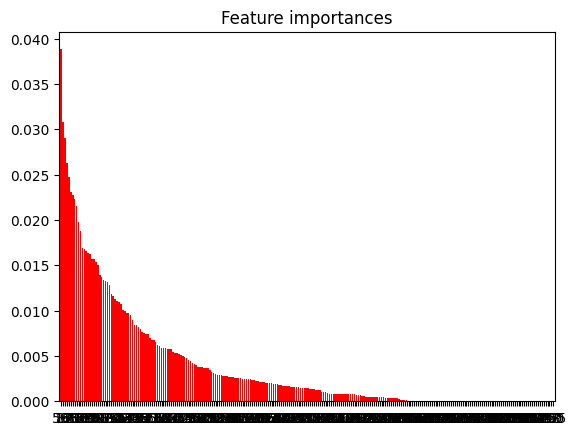

In [26]:
X = df_verseny_public_train.drop(['target', 'cookie_id'], axis=1)
y = df_verseny_public_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Random forest

Feature ranking:
1. Feature 7 (0.025094) Topic4_ec
2. Feature 68 (0.024301) Topic55_ic
3. Feature 17 (0.023320) Topic12_ec
4. Feature 6 (0.021947) Topic4_ic
5. Feature 19 (0.021673) Topic13_ec
6. Feature 21 (0.021008) Topic14_ec
7. Feature 83 (0.020763) Topic63_ec
8. Feature 82 (0.020738) Topic63_ic
9. Feature 16 (0.020692) Topic12_ic
10. Feature 20 (0.020504) Topic14_ic
11. Feature 71 (0.020372) Topic56_ec
12. Feature 59 (0.020289) Topic42_ec
13. Feature 70 (0.019513) Topic56_ic
14. Feature 18 (0.019487) Topic13_ic
15. Feature 4 (0.017320) Topic3_ic
16. Feature 61 (0.017097) Topic51_ec
17. Feature 69 (0.016957) Topic55_ec
18. Feature 67 (0.016487) Topic54_ec
19. Feature 66 (0.016346) Topic54_ic
20. Feature 29 (0.014362) Topic19_ec
21. Feature 28 (0.014315) Topic19_ic
22. Feature 1 (0.012084) Topic1_ec
23. Feature 105 (0.011610) Topic74_ec
24. Feature 87 (0.011342) Topic65_ec
25. Feature 35 (0.011224) Topic24_ec
26. Feature 12 (0.011169) Topic9_ic
27. Feature 22 (0.010761) Topic15_ic
2

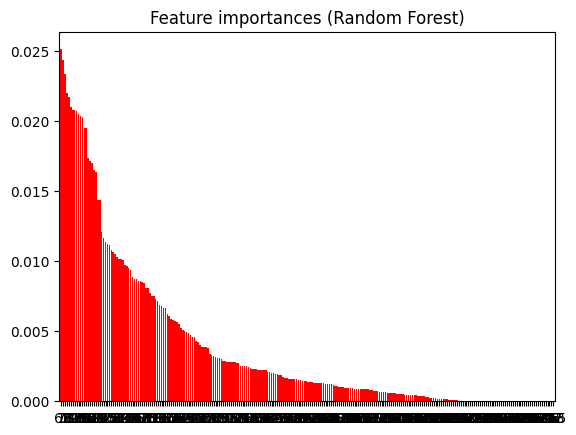

In [27]:
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)


importances_rf = clf_rf.feature_importances_


indices_rf = np.argsort(importances_rf)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]], X.columns[indices_rf[f]]))

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(X.shape[1]), importances_rf[indices_rf],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices_rf)
plt.xlim([-1, X.shape[1]])
plt.show()

In [28]:
# Create DataFrames for feature importances
dt_feature_importances = pd.DataFrame({'Feature': indices, 'Importance_DT': importances[indices]})
rf_feature_importances = pd.DataFrame({'Feature': indices_rf, 'Importance_RF': importances_rf[indices_rf]})

# Merge DataFrames on the 'Feature' column
merged_feature_importances = pd.merge(dt_feature_importances, rf_feature_importances, on='Feature')

print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
     Feature  Importance_DT  Importance_RF
0         59       0.038827   2.028914e-02
1         17       0.030778   2.332040e-02
2         82       0.029022   2.073792e-02
3          7       0.026319   2.509416e-02
4         68       0.024741   2.430081e-02
..       ...            ...            ...
251      217       0.000000   0.000000e+00
252      218       0.000000   0.000000e+00
253      219       0.000000   0.000000e+00
254      220       0.000000   9.758509e-08
255      255       0.000000   0.000000e+00

[256 rows x 3 columns]


In [29]:
percentile_threshold = 0.8

importance_threshold_dt = merged_feature_importances['Importance_DT'].quantile(percentile_threshold)
importance_threshold_rf = merged_feature_importances['Importance_RF'].quantile(percentile_threshold)

print("Threshold value based on the top", int(percentile_threshold * 100), "percentileDT:", importance_threshold_dt, "percentileRF:", importance_threshold_rf)


Threshold value based on the top 80 percentileDT: 0.0061016625252648315 percentileRF: 0.006853086825579711


In [30]:
merged_feature_importances = merged_feature_importances[(merged_feature_importances['Importance_DT'] > importance_threshold_dt) & (merged_feature_importances['Importance_RF'] > importance_threshold_rf)]
print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
    Feature  Importance_DT  Importance_RF
0        59       0.038827       0.020289
1        17       0.030778       0.023320
2        82       0.029022       0.020738
3         7       0.026319       0.025094
4        68       0.024741       0.024301
5        61       0.023082       0.017097
6        21       0.022804       0.021008
7        83       0.022338       0.020763
8        16       0.021560       0.020692
9        66       0.019745       0.016346
10       70       0.018750       0.019513
11       18       0.016906       0.019487
12       28       0.016797       0.014315
13       29       0.016604       0.014362
14       63       0.016319       0.010484
15       69       0.016248       0.016957
16       20       0.015649       0.020504
17        6       0.015643       0.021947
18       14       0.015413       0.010098
19       71       0.015002       0.020372
20        9       0.013981       0.010293
21       67       0.013756       0.016487
22    